In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown
import ipywidgets

In [16]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [17]:
# Step 1: Load CSV dataset
data = pd.read_csv('2024-02-26_14-03-46_merged_all.csv')

data.head()

,ISIN,Currency,Venue,TradeTime,Price,Trade_id,Phase,Quantity,side,id,primary_ticker,primary_mic,TradeTime_min_1,TradeTime_1,best_bid_size,best_bid,best_ask,best_ask_size,market_state_best,best_bid_min_1s,best_ask_min_1s,market_state_min_1s,best_bid_size.1,best_bid_1s,best_ask_1s,best_ask_size.1,market_state_1s,mid_price,mid_price_min_1s,mid_price_1s,slippage
0,DE0006305006,EUR,XETA,2022-09-02 07:00:09.160,3.606,0,OPENING_AUCTION,-150,-1,331530,DEZ,XETR,2022-09-02 07:00:08.160,2022-09-02 07:00:10.160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BE0003851681,EUR,XBRU,2022-09-02 07:00:25.196,92.800,82,OPENING_AUCTION,71,1,328336,AED,XBRU,2022-09-02 07:00:24.196,2022-09-02 07:00:26.196,28.0,92.80,92.90,84.0,OPENING_AUCTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.85,NaN,NaN,1.0
2,BE0003851681,EUR,XBRU,2022-09-02 07:02:02.577,93.050,83,OPENING_AUCTION,13,1,328336,AED,XBRU,2022-09-02 07:02:01.577,2022-09-02 07:02:03.577,8.0,93.05,93.35,56.0,CONTINUOUS_TRADING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.20,NaN,NaN,1.0
3,DE0006305006,EUR,XETA,2022-09-02 07:02:32.790,3.624,1,OPENING_AUCTION,-198,-1,331530,DEZ,XETR,2022-09-02 07:02:31.790,2022-09-02 07:02:33.790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DE0006305006,EUR,XETA,2022-09-02 07:03:01.573,3.622,2,OPENING_AUCTION,-85,-1,331530,DEZ,XETR,2022-09-02 07:03:00.573,2022-09-02 07:03:02.573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Create a function to plot the data
def plot_data(company, date):
    # Filter data for the selected company and date
    filtered_data = data[(data['primary_ticker'] == company) & (data['TradeTime'] == date)]
    
    # Create subplots
    fig, ax1 = plt.subplots()

    # Plot price line on left axis
    sns.lineplot(data=filtered_data, x='TradeTime', y='Price', ax=ax1)
    ax1.set_ylabel('Price')

    # Create right axis for volume histogram
    ax2 = ax1.twinx()
    sns.histplot(data=filtered_data, y='best_bid_size', x='TradeTime', ax=ax2, color='orange', bins=30)
    sns.histplot(data=filtered_data, y='best_ask_size', x='TradeTime', ax=ax2, color='blue', bins=30)
    ax2.set_ylabel('bid_sizes', color='black')
    
    # Set title
    plt.title(f'{company} Stock Price and Volume on {date}')

    plt.show()

# Create dropdown for selecting company
company_dropdown = Dropdown(options=data['primary_ticker'].unique(), description='Company:')

# Step 4: Create time period selection slider
time_slider = ipywidgets.SelectionRangeSlider(
    options=pd.to_datetime(data['TradeTime']).sort_values(),
    index=(0, len(data)-1),
    description='Time Period:',
    layout={'width': '400px'}
)

# Create interactive plot
interact(plot_data, company=company_dropdown, date=time_slider)


interactive(children=(Dropdown(description='Company:', options=('DEZ', 'AED', 'VOW3', 'MBG', 'NOVN', 'ROG', 'L…

<function __main__.plot_data(company, date)>

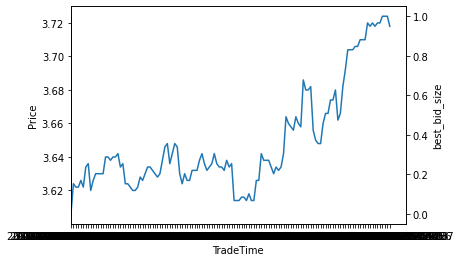

In [38]:
    # Filter data for the selected company and date
    filtered_data = data[(data['primary_ticker'] == 'DEZ')]
    
    # Create subplots
    fig, ax1 = plt.subplots()

    # Plot price line on left axis
    sns.lineplot(data=filtered_data, x='TradeTime', y='Price', ax=ax1)
    ax1.set_ylabel('Price')

    # Create right axis for volume histogram
    ax2 = ax1.twinx()
    sns.histplot(data=filtered_data, y='best_bid_size', ax=ax2, color='orange', bins=30)
    sns.histplot(data=filtered_data, y='best_ask_size', ax=ax2, color='blue', bins=30)

    plt.show()